In [1]:
# Import library
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem.snowball import RussianStemmer #https://www.nltk.org/howto/stem.html
import wordcloud # https://www.datacamp.com/tutorial/wordcloud-python
from wordcloud import WordCloud

In [2]:
text = pd.read_csv('data_online_reviews.csv', delimiter = ';')
print('Data has', len(text), 'reviews')
text.head()

Data has 2458 reviews


,Name,Month,Star,Comment
0,Ural,1,1,Просто ужасно.
1,Ural,1,1,"Компания,преступники!"
2,Ural,1,5,Большое спасибо командиру корабля рейса U6 651...
3,Ural,1,1,Ужасные авиалинии
4,Ural,1,1,Эпоха задержек подходит к концу. Я перестаю ле...


In [3]:
# Ceate new column, which vowels in the end of words are omitted
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('russian')]

    # Lemmatize the tokens
    stemmer = RussianStemmer()
    stemmer.stem("Autobahnen")
    stemmerized_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(stemmerized_tokens)

    return processed_text

In [4]:
text['Comment1'] = text['Comment'].apply(preprocess_text)
text

,Name,Month,Star,Comment,Comment1
0,Ural,1,1,Просто ужасно.,прост ужасн .
1,Ural,1,1,"Компания,преступники!","компан , преступник !"
2,Ural,1,5,Большое спасибо командиру корабля рейса U6 651...,больш спасиб командир корабл рейс u6 651 09.01...
3,Ural,1,1,Ужасные авиалинии,ужасн авиалин
4,Ural,1,1,Эпоха задержек подходит к концу. Я перестаю ле...,эпох задержек подход конц . переста лета ураль...
...,...,...,...,...,...
2453,Победы,12,1,Крохоборы,крохобор
2454,Победы,12,1,ПОБЕДА! Таких мошенников первый раз в жизни вс...,побед ! так мошенник перв жизн встрет .
2455,Победы,12,1,Опять,
2456,Победы,12,3,Лоукостер,лоукостер


In [5]:
# Filter unsatisfied reviews with 1 and 2 stars
nega = text[text['Star'].isin([1,2])] 
nega.shape

(1449, 5)

In [6]:
# Filter satisfied reviews with 4 and 5 stars
posi = text[text['Star'].isin([4,5])] 
posi.shape

(895, 5)

In [7]:
# create more specified stopwords for reviews 
stopwords = ['в','у', 'и', 'не', 'как', 'был', 'что', 'но', 'за', 'а', 'я', 
             'нет', 'котор', 'где', 'вы', 'ты', 'мне', 'тольк', 'до', 
             'на', 'с', 'для', 'по', 'сво', 'так', 'э','т', 'он', 'то', 
             'из', 'вот', 'при', 'от', 'при', 'очен', 'мы', 'когд', 'есл', 'сам', 
             'чтоб', 'уж', 'даж', 'посл', 'больш', 'хот', 'без', 'через', 'пришл', 
             'вам', 'их', 'над', 'ещ', 'нич', 'мо', 'ни', 'нам','мног', 'мен', 'эт',
             'пот', 'нуж', 'них', 'ил', 'бы', 'одн', 'нас', 'друг', 'же', 
             'можн', 'ест', 'лета', 'летел', 'должен', 'нача', 'к', 'ваш', 'е', 
             'тож', 'сказа', 'вас', 'вылет', 'нужн', 'там', 'чем',
             'рейс', 'все', 'компан', 'самолет', 'хорошо', 'всегд', 'спасиб', 
             'перелет', 'авиакомпан', 'нрав', 'хорош', 'прост', 'будет', 'дан', 'должн', 
             'никогд', 'получ', 'никт', 'полет', 'итог', 'отличн', 'лучш', 'аэрофлот', 'понрав', 'побед', 'росс', 'всем']

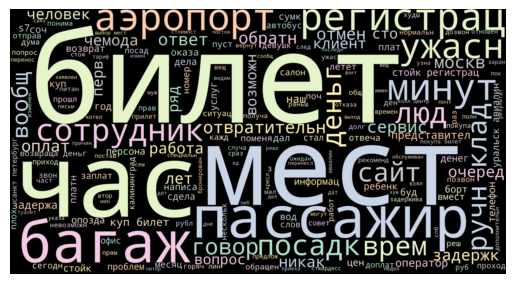

In [8]:
#For DataFrame "nega"
text_here = " ".join(text1 for text1 in nega["Comment1"])
wordcloud = WordCloud(stopwords = stopwords, width = 3000, 
                      height = 1600, background_color="black", colormap = 'Pastel2').generate(text_here)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("nega.png", format="png")
plt.show()

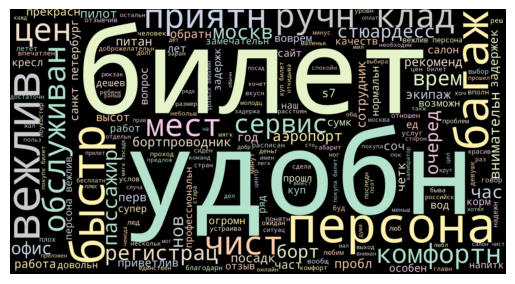

In [9]:
#For DataFrame "posi"
text_here = " ".join(text1 for text1 in posi["Comment1"])
wordcloud = WordCloud(stopwords = stopwords, width = 3000, height = 1600, 
                      background_color="black",colormap = 'Pastel2').generate(text_here)
# Display the generated image:


# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("posi.png",  format="png")
plt.show()

In [10]:
#If gray graphics are prefered, use it !!!!
from PIL import Image
img = Image.open('posi.png').convert('L')
img.save('posigreyscale.png')